In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0, 0.5, 'frequency')

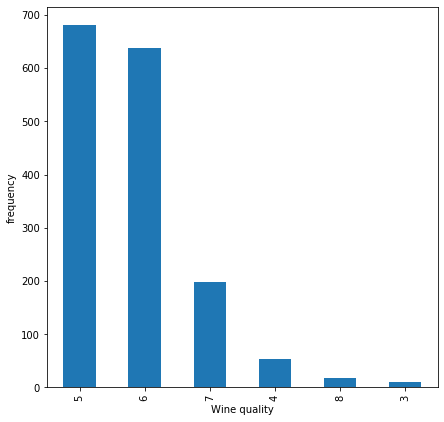

In [8]:
plt.figure(figsize=(7,7))
data_chk=df.quality.value_counts()
print(data_chk)
data_chk.plot(kind='bar')
plt.xlabel("Wine quality")
plt.ylabel("frequency")

In [7]:
df[df.sulphates <= 2].head(19)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
df_test = df[['free sulfur dioxide','total sulfur dioxide','density','pH','alcohol','quality']]
df_test.head(5)

,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,11.0,34.0,0.9978,3.51,9.4,5
1,25.0,67.0,0.9968,3.20,9.8,5
2,15.0,54.0,0.9970,3.26,9.8,5
3,17.0,60.0,0.9980,3.16,9.8,6
4,11.0,34.0,0.9978,3.51,9.4,5


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Boxplot to determine outliners and how data is distributed


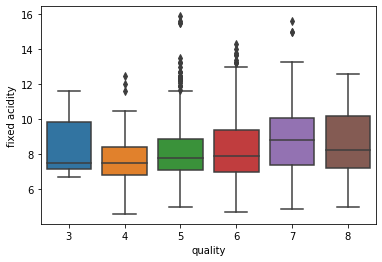

In [10]:
sns.boxplot(x='quality',y='fixed acidity', data=df)

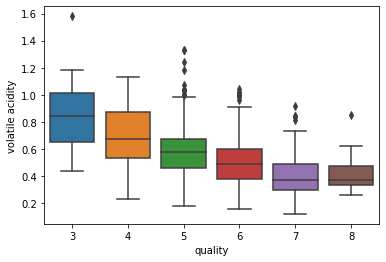

In [11]:
sns.boxplot(x='quality',y='volatile acidity', data=df)

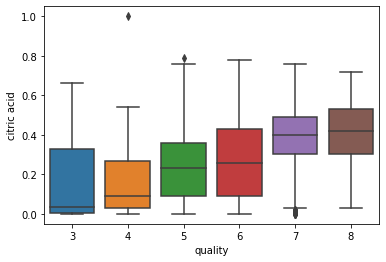

In [12]:
sns.boxplot(x='quality',y='citric acid', data=df)

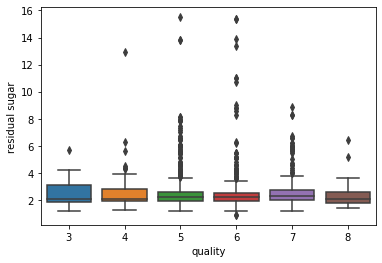

In [13]:
sns.boxplot(x='quality',y='residual sugar', data=df)

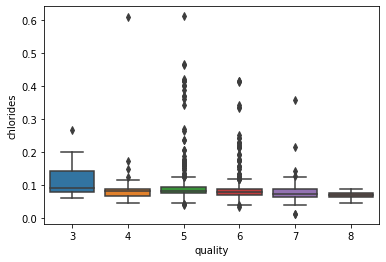

In [14]:
sns.boxplot(x='quality',y='chlorides', data=df)

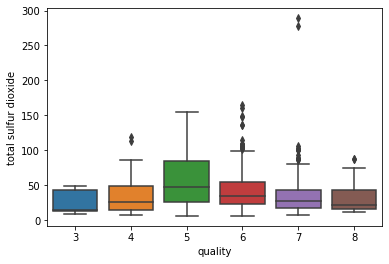

In [15]:
sns.boxplot(x='quality',y='total sulfur dioxide', data=df)

In [98]:
df[df['total sulfur dioxide'] > 250]   # dropping the outliner value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Review


In [9]:
df.drop(index=[1081,1079],inplace=True)
df.reset_index(inplace=True)

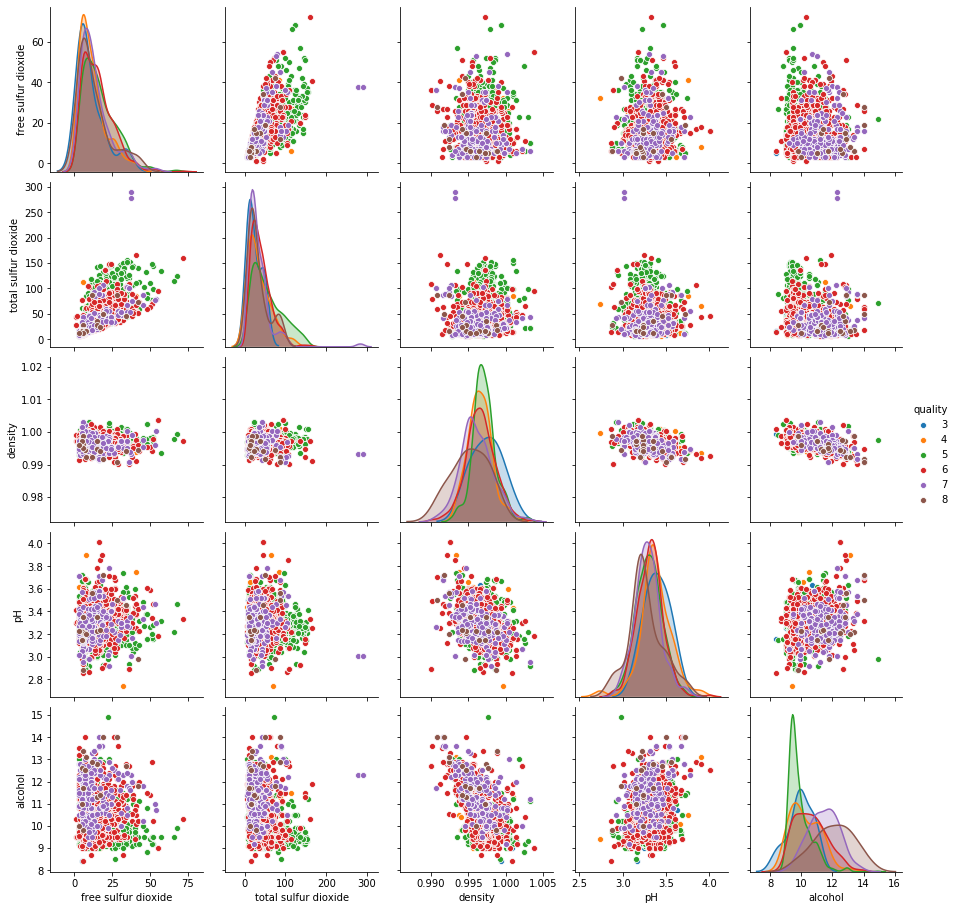

In [100]:
sns.pairplot(df_test,hue="quality")

In [10]:
# df_final=df_test[['free sulfur dioxide','total sulfur dioxide','quality']]
df_final=df_test[['alcohol','quality']]
df_final

NameError: name 'df_test' is not defined

In [11]:
X=df.drop(columns=['quality','total sulfur dioxide','free sulfur dioxide'])
y=df['quality']

# coluumn standardistaion

In [12]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)
X_train.shape

(1069, 10)

# Using SVM with rbf kernel

In [14]:
model=SVC(C=1, kernel='rbf',gamma=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
score=accuracy_score(Y_test,predictions)
print(score)


0.6268939393939394


# Performing Cross validation

In [15]:
model = SVC()                    #create a dictionary of all values we want to test for n_neighbors
parameters = {'C': np.arange(1,6),'gamma': np.arange(1,6)}        #use gridsearch to test all values for n_neighbors
LS_gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5)   #fit model to data
LS_gs.fit(X_train, Y_train)
print(f'The best value of C is :- {LS_gs.best_params_} and the best score is {LS_gs.best_score_}')

KeyboardInterrupt: 

In [55]:
LS_gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [58]:
LS_gs.cv_results_

{'mean_fit_time': array([0.1061377 , 0.11739597, 0.1285089 , 0.14463682, 0.15537386,
        0.10742645, 0.11664858, 0.12691975, 0.14299335, 0.15699005,
        0.10735536, 0.1170176 , 0.12743921, 0.14486399, 0.15721765,
        0.10661659, 0.11344032, 0.12688627, 0.14106417, 0.15660844,
        0.10854349, 0.11382399, 0.12694764, 0.1431942 , 0.15527568,
        0.10839634, 0.11360979, 0.12890005, 0.1429975 , 0.15674582]),
 'std_fit_time': array([0.00638575, 0.00332609, 0.00307967, 0.00450986, 0.00496242,
        0.00376988, 0.00457879, 0.00341316, 0.00311897, 0.00405506,
        0.00440404, 0.00430865, 0.0043547 , 0.00458865, 0.00422326,
        0.00457838, 0.0038364 , 0.00408896, 0.00021315, 0.00459294,
        0.00297526, 0.00370803, 0.00427263, 0.00308152, 0.00494927,
        0.0029976 , 0.00288271, 0.00406257, 0.00305718, 0.0037192 ]),
 'mean_score_time': array([0.00987673, 0.00443769, 0.00798125, 0.00845747, 0.00967822,
        0.00766602, 0.00808601, 0.00685725, 0.00687213, 0.00

#  Finding the corelation

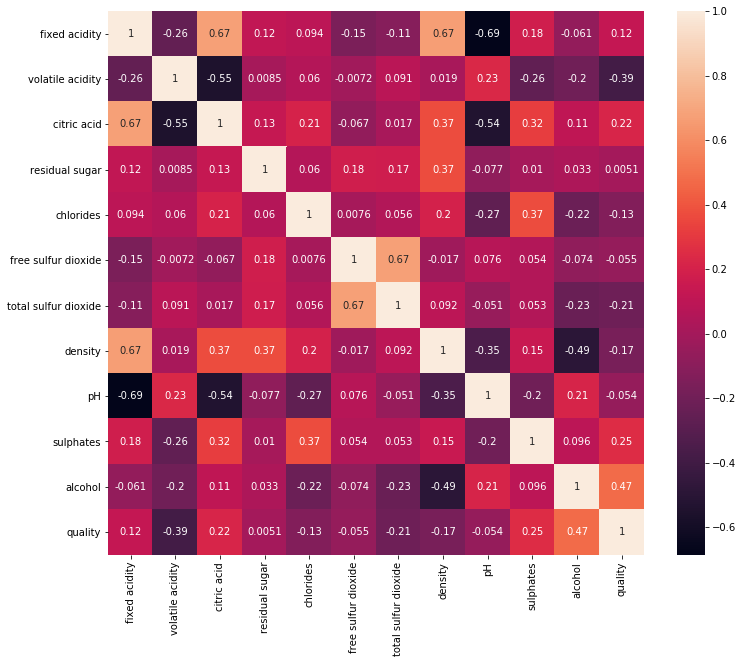

In [31]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

No column shows significant relation with the target column

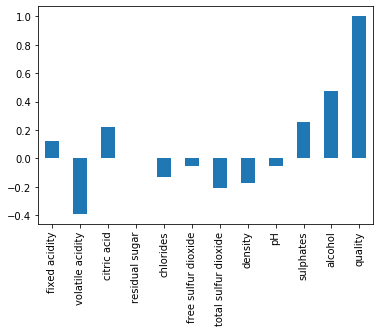

In [35]:
cor['quality'].plot(kind='bar')

# Adding a new column review

In [16]:
df.reset_index()
cust_review = []
quality=list(df['quality'])
for i in quality:
    if i >= 5:
        cust_review.append('1') #1=best
    else:
        cust_review.append('0') #0=bad

In [17]:
print(df.shape)
print(len(quality))
df['Review'] = cust_review
df.head(5)

(1597, 13)
1597


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Review
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [18]:
df['Review'].isnull().sum()

0

Text(0, 0.5, 'Total numbers')

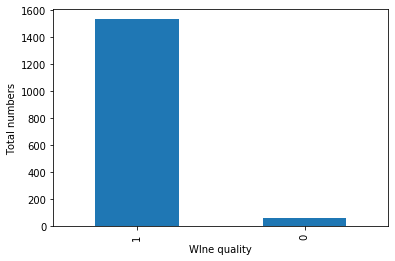

In [139]:
df['Review'].value_counts().plot(kind='bar')
plt.xlabel('WIne quality')
plt.ylabel('Total numbers')

# Splitting and trainig Model

In [19]:
X_again =df.drop(columns=['quality','Review'])
Y_again=df['Review']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X_again, Y_again, test_size=0.33, random_state=42)
X_train.shape

(1069, 12)

In [ ]:
model=SVC(C=1, kernel='poly',gamma=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
score=accuracy_score(Y_test,predictions)
print(score)


# Grid Search

In [22]:
model = SVC()                    #create a dictionary of all values we want to test for n_neighbors
parameters = {'C': np.arange(1,15),'gamma': np.arange(1,3,0.1)}        #use gridsearch to test all values for n_neighbors
LS_gs = GridSearchCV(estimator=model, param_grid=parameters, cv=5)   #fit model to data
LS_gs.fit(X_train, Y_train)
print(f'The best value of C is :- {LS_gs.best_params_} and the best score is {LS_gs.best_score_}')

The best value of C is :- {'C': 1, 'gamma': 1.0} and the best score is 0.9607125619762188


In [24]:
LS_gs.cv_results_

{'mean_fit_time': array([0.10770998, 0.10320349, 0.1064817 , 0.09987206, 0.10048509,
        0.09719677, 0.09931359, 0.10089884, 0.10074015, 0.10002203,
        0.09606309, 0.09532537, 0.09956908, 0.1140595 , 0.10163126,
        0.10770807, 0.10768237, 0.09874926, 0.10127106, 0.10762434,
        0.09768815, 0.10830488, 0.09896884, 0.09723864, 0.09404111,
        0.09555993, 0.10121136, 0.09646082, 0.09621234, 0.098914  ,
        0.09681029, 0.09849472, 0.09926829, 0.09847364, 0.09727864,
        0.10003033, 0.09880786, 0.09878283, 0.09686627, 0.10090146,
        0.09808574, 0.09875803, 0.09672446, 0.09851861, 0.09565392,
        0.09477329, 0.09754424, 0.09507995, 0.09711418, 0.09768028,
        0.09890242, 0.09689088, 0.09687972, 0.09733152, 0.09875374,
        0.0980329 , 0.09929647, 0.09807572, 0.14066224, 0.11080952,
        0.10692077, 0.11489835, 0.10946302, 0.11961694, 0.1435009 ,
        0.15823607, 0.14480457, 0.11055717, 0.13593979, 0.11221256,
        0.10660653, 0.1048667 ,

In [149]:
np.arange(0.1,6,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])